### Peter Hung (peterkhung@gmail.com)

# Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [269]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import math
import matplotlib.pyplot as plt

#Importing data
def shop_data():
    df = pd.read_excel('shopify_dataset.xlsx')
    return df

shop_data = shop_data()
shop_data.head() #Display top 5 values

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


### 1.0 Preliminary Analysis

Given a cursory view of the dataset, it does seem odd that the Average Order Value (AOV) is $3145.13, as the shoe prices hover around low hundreds, and the total items per order appears to be usually less than ten. 

Before starting, there are a number of factors to consider, and assumptions to be made.

__I) Is the AOV an absolute definition?__
<br>
If so, then we cannot change our calculation, and a new metric must be defined. However, as outlined in the preamble, AOV appears to be a malleable definition.
__II) What is the purpose of the AOV, and who is this number for?__
Different types of businesses have different customers, and it may not make sense compare their AOVs. A single definition of an AOV for a B2C is different from a B2B.

__III) What is considered relatively affordable?__ 
<br>
Different businesses offer different products, which will lead to different relativities of affordability for the customers.
More quantitative definitions must be defined later.
It may be a good approach to define different types of businesses.


I have decided to use Python with the Pandas library as it fast and easy to use for data analysis compared to running calculations in Excel.

First, I will define the data frame, and gain an initial understanding of the statistics overall. Furthermore in order to understand the sense of scale for the current AOV, I am also interested to see how much each pair of shoes cost on average.


In [60]:
shop_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [63]:
tot_ord_amt = shop_data['order_amount'].sum()
avg_shoe_amt = tot_ord_amt/shop_data['total_items'].sum()
print('The average shoe price overall is:', avg_shoe_amt)

The average shoe price overall is: 357.92152221412965


As shown above, the AOV was calculated “correctly” if we were to follow the strict definition of the Average Order Value ($3145.13).

It is also interesting to see the Standard Deviation is in the 10,000s, despite the average price per shoe is ~358. This number might be helpful later.

__Thought__: With such a big discrepancy between the average shoe price and current AOV, there is likely an outlier pulling the average up. Is there only one outlier? Or are there multiple values that pull the average up? Is this outlier erroneous?
 
I would like to see what the largest transactions look like…



In [35]:
shop_data.nlargest(20,'order_amount')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00.000
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00.000
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00.000
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00.000
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00.000
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000


__Observation:__ By looking at the largest values above, there are multiple significant transactions that will severely shift the average. Since it is not a single outlier, the orders may not be erroneous. However…


__Interesting Observation__: In the output table above, there are highlighted cells that match with their corresponding colours. These are marked because the date-time look strange. For example, if we refer to the dark yellow cells, the date-time are all 2017-03-28 4:00 for orders of 2000 shoes to a total of $704,000 each. There are 3 significant transactions that occur exactly at 4:00AM. This is very suspicious. Furthermore, despite the orders occuring at the same time, the order_id jump significantly (such as 2970 to 4057). However, this may be how the system logs transactions and I will assume this is out of scope.


Regardless, it may be that orders occuring at the same exact time should only be counted for once. It should be noted that this only occurs for Shop 42. 


Shop 42 seems to be a large distributor for shoes (likely to be selling bulk orders to retailers) as shown in the "Total Items" column above.


It is also interesting to see that Shop 78 conducts large value transactions, but with very limited items per order. For example, an order was valued at $154350.00 for only 6 items. Shop 78 is probably a consignment store selling rare sneakers.


Plotting a graph for a visual overview of outliers.

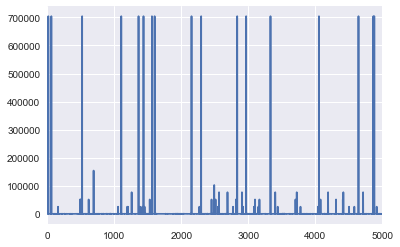

In [36]:
shop_data['order_amount'].plot()
plt.show()

### Mid-process Thoughts

__Assumption__: From the data, it can be assumed there are Business-to-Customers Shopify stores and Business-to-Business Shopify stores. Furthermore, each store specializes in different types of shoes (such as Shop 42 selling shoes valued at 352.00 per shoe vs. Shop 78 selling 25725.00 per shoe.
 
Therefore, we should perform calculations based on the business and product type. This is because even if we were to eliminate the large outliers, as shown for Shop 78, they sell vastly different shoes. Assuming we get a more representative number of the dataset overall (lower), then it would not make sense for Shop 78. 
 
Before jumping directly to a solution, I would like to explore possible approaches:
1. Remove the data points and recalculate AOV.
2. Classify B2B Stores and B2C stores, and recalculate AOV.
3. Using the median.


#### Approach #1: Remove the large data points
Although visually we can easily pick off the large values and hard code the parameters, but how do we tell the computer which numbers are unwanted?

We could use the __standard deviation__ from the __order amount__.

In [67]:
shop_data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

As shown above, the STD is __41282.54__ which is signficantly larger than the minimum value of __90.00__.

Therefore, we could create a new __Data Frame__ that only includes values less than the first standard deviation by using pandas' comparison operators.

In [42]:
shop_data_adjusted = shop_data[shop_data['order_amount']<shop_data['order_amount'].describe()['std']]
shop_data_adjusted.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000
mean,2500.037934,49.954399,849.865214,400.043382,1.990920
std,1443.721552,29.057505,86.814578,1579.398646,0.982859
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.750000,24.000000,776.000000,163.000000,1.000000
50%,2498.500000,50.000000,850.000000,284.000000,2.000000
75%,3751.250000,75.000000,925.000000,390.000000,3.000000
max,5000.000000,100.000000,999.000000,25725.000000,8.000000


Now, the Average Order Value is 400.04. This number is significantly smaller than the initial AOV, but the question is, is it more representative of the data?

Although it captures the average order value of the majority of the stores better, this completely removes specific stores from the calculation. Again, the value we want would depend on the purpose of the analysis.

Another factor to consider when removing data points would be removing the “duplicate” $704,000 transactions that occur at the same time from Shop 42. As the case does not provide further information on this, I will assume Shop 42 has the order automated to be sold at that time for their business customers, and it is not erroneous.

__Approach #2 - Classify Stores__

As illustrated earlier, assuming if we are evaluating the performance of the Shopify stores, values hold entirely different meanings depending on their type of customer. This type of business segregation will help Shopify evaluate the types of store owners on its platform and how they can better support them.


In [293]:
shop_data['total_items'].describe()

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

In [294]:
avg_shoe_price = shop_data['order_amount']/shop_data['total_items']
shop_data['avg_shoe_price']  = avg_shoe_price
shop_data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_shoe_price,business_type
158,159,92,795,90,1,credit_card,2017-03-29 03:07:12.224,90.0,general
4219,4220,92,747,90,1,credit_card,2017-03-25 20:16:57.851,90.0,general
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999,90.0,general
228,229,92,757,90,1,debit,2017-03-13 23:57:51.040,90.0,general
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31.493,90.0,general


In [295]:
shop_data['avg_shoe_price'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: avg_shoe_price, dtype: float64

In [298]:
shop_data_order_desc = shop_data.sort_values('order_amount',ascending=False)
shop_data_order_desc

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_shoe_price,business_type
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000,352.0,distributor
4056,4057,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000,352.0,distributor
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000,352.0,distributor
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000,352.0,distributor
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000,352.0,distributor
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000,352.0,distributor
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000,352.0,distributor
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00.000,352.0,distributor
2835,2836,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000,352.0,distributor
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00.000,352.0,distributor


The top 18 orders were of 2000 units sold from Shop 42. Under the assumption an average consumer does not purchase 2000 units of shoes consistently, these are B2C transactions. (Note: Shop 42 also sells low price shoes with low # number of item per transaction. Shop 42 could be a hybrid between Distributor and General).

The next 46 transactions were sold from Shop 78, with 1-6 units sold per transaction, with each shoe valuing at $25,725. These are likely sold from Consignment stores selling rare shoes such as Eminem’s Air Jordan 4 Retro.

There is a steep drop off for the rest of the transactions, valuing at less than $1760 per order. These will be classified as General Stores. 

Visualization of the descending order amounts:


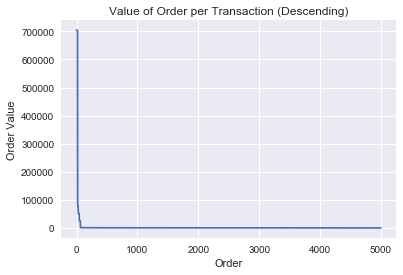

In [299]:
a = shop_data['order_amount'].tolist()
a.sort(reverse=True)
plt.plot(a)
plt.xlabel('Order')
plt.ylabel('Order Value')
plt.title('Value of Order per Transaction (Descending)')
plt.show()
plt.savefig('order_amount_desc.png')

#### Defining the Business Type

In [296]:
df = shop_data
df['business_type'] = np.where(df['total_items']>df['total_items'].describe()['std'], 'distributor',np.where(df['avg_shoe_price']>df['avg_shoe_price'].describe()['std'],'consignment','general'))
df.sort_values('order_amount',inplace=True)
df.to_csv('updated-shopify-data.csv')
df.tail(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,avg_shoe_price,business_type
2690,2691,78,962,77175,3,debit,2017-03-22 07:33:25.104,25725.0,consignment
2492,2493,78,834,102900,4,debit,2017-03-04 04:37:33.848,25725.0,consignment
691,692,78,878,154350,6,debit,2017-03-27 22:51:43.203,25725.0,consignment
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00.000,352.0,distributor
4646,4647,42,607,704000,2000,credit_card,2017-03-02 04:00:00.000,352.0,distributor
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000,352.0,distributor
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00.000,352.0,distributor
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00.000,352.0,distributor
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00.000,352.0,distributor
2969,2970,42,607,704000,2000,credit_card,2017-03-28 04:00:00.000,352.0,distributor


#### Defining a new AOV

In [300]:
df_g = df[df['business_type']=='general']
df_g.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg_shoe_price
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734,151.788536
std,1444.069407,29.061131,86.840313,160.804912,0.982821,29.034215
min,1.000000,1.000000,700.000000,90.000000,1.000000,90.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000,153.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000,166.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000,352.000000


In [301]:
df_c = df[df['business_type']=='consignment']
df_c.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg_shoe_price
count,46.000000,46.0,46.000000,46.000000,46.000000,46.0
mean,2663.021739,78.0,867.739130,49213.043478,1.913043,25725.0
std,1338.520020,0.0,81.314871,26472.227449,1.029047,0.0
min,161.000000,78.0,707.000000,25725.000000,1.000000,25725.0
25%,1428.250000,78.0,812.500000,25725.000000,1.000000,25725.0
50%,2796.500000,78.0,866.500000,51450.000000,2.000000,25725.0
75%,3720.250000,78.0,935.750000,51450.000000,2.000000,25725.0
max,4919.000000,78.0,997.000000,154350.000000,6.000000,25725.0


In [302]:
df_d = df[df['business_type']=='distributor']
df_d.describe()

,order_id,shop_id,user_id,order_amount,total_items,avg_shoe_price
count,17.000000,17.0,17.0,17.0,17.0,17.0
mean,2336.235294,42.0,607.0,704000.0,2000.0,352.0
std,1603.584872,0.0,0.0,0.0,0.0,0.0
min,16.000000,42.0,607.0,704000.0,2000.0,352.0
25%,1363.000000,42.0,607.0,704000.0,2000.0,352.0
50%,2154.000000,42.0,607.0,704000.0,2000.0,352.0
75%,3333.000000,42.0,607.0,704000.0,2000.0,352.0
max,4883.000000,42.0,607.0,704000.0,2000.0,352.0


As shown above, the mean is now meaningful – as averages hold different meanings dependent on the type of product they sell and to whom they sell to. If we used the generalized average of 3145.13, it would not make any sense to any of these businesses. Most stores never even have any transactions above 3000.00 and some stores never see any transactions below 3000.00. 

#### Approach #3: Using the Median
In order to use the median, the data set should be first sorted. As median takes the middle index of a data set, if the _order amount_ is not sorted accordinly, the value would not make sense.

We will first create a new data frame with the sorted values.

In [50]:
shop_data_sorted = shop_data.sort_values('order_amount')
shop_data_sorted.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
158,159,92,795,90,1,credit_card,2017-03-29 03:07:12.224
3871,3872,92,818,90,1,debit,2017-03-18 09:10:07.550
4760,4761,92,937,90,1,debit,2017-03-20 07:37:27.858
4923,4924,92,965,90,1,credit_card,2017-03-09 05:05:10.932
4932,4933,92,823,90,1,credit_card,2017-03-24 02:17:12.909


In [51]:
shop_data_sorted.tail(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 04:00:00


Looking at the top 5 rows and the bottom 5 rows, the data is verified to be appropriately sorted based on order_amount.

_Finally, we can look at the median value_.




In [52]:
shop_data_sorted.median()

order_id        2500.5
shop_id           50.0
user_id          849.0
order_amount     284.0
total_items        2.0
dtype: float64

Aha! Now this is big difference! 

As you can see the _median order amount_ is __$284.00__.

This brings us to Part B...

### b. What metric would you report for this dataset?

__Analysis__
Referring back to the beginning, the metric I would report would depend on who and what purpose this metric is for. 

If the purpose of this analysis was to evaluate the individual performance of stores, then Approach #2 would be the ideal solution, as different types of businesses should follow different metric expectations. As outlined in #2, some stores sell on average ~50,000 per transaction and some sell ~300.00. It is ineffective to group these two businesses together when measuring their metrics.

However, from the nature of the question, it can be implied that the person looking for this metric is looking for a value that could be generalized across all stores to get an idea of how sneaker stores are performing overall on the Shopify platform. This would leave Approach #2 out of the evaluation.

__Therefore, I would report the median order value.__

__Reasoning__
My reasoning to choose Approach #3 over #1 is not only because it is simpler, it does not drop any data points. For Approach #1, the dataset had to be manipulated by dropping the outliers based off the the difference in standard deviation. With more manipulation, there is more room for error. The reported number is 400.04 which is higher than our median value by ~30%.

Although the mean is better at generating a more representative number for datasets that do not contain outliers, the median is better in this scenario because it is much more resistant to outliers.

Although we took three different approaches to get to this number despite our initial suspicions, I wanted to ensure we covered all possibilities. As shown in Approach #2, there were some interesting findings we would not have discovered if we had jumped straight into it.


### c. What is its value?

The value as reported in Part B, is __$284.00__

# Question 2
For this question you’ll need to use SQL. ​Follow this link​ to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### a. How many orders were shipped by Speedy Express in total?
SELECT COUNT(Orders.OrderID), Shippers.ShipperName FROM Orders
<br>
INNER JOIN Shippers ON Orders.ShipperID=Shippers.ShipperID
<br>
WHERE Shippers.ShipperName="Speedy Express";

__RESULT__: 54 Orders were shipped by Speedy Express in total.

### b. What is the last name of the employee with the most orders?
SELECT COUNT(OrderID), Orders.EmployeeID, Employees.LastName
<br>
FROM Orders
<br>
INNER JOIN Employees ON Orders.EmployeeID=Employees.EmployeeID
<br>
GROUP BY Orders.EmployeeID
<br>
ORDER BY COUNT(OrderID) DESC;

__RESULT__: 40 Orders made by PEACOCK


### c. What product was ordered the most by customers in Germany?

SELECT SUM(OrderDetails.Quantity), Products.ProductName, Customers.Country 
<br>
FROM [OrderDetails] 
<br>
INNER JOIN Products ON OrderDetails.ProductID = Products.ProductID
<br>
INNER JOIN Orders ON OrderDetails.OrderID = Orders.OrderID
<br>
INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID
<br>
WHERE Country = "Germany"
<br>
GROUP BY Products.ProductID
<br>
ORDER BY SUM(OrderDetails.Quantity) DESC; 

__RESULT__: 160 of BOSTON CRAB MEAT was ordered the most by customers in Germany